<a href="https://colab.research.google.com/github/Dariusz-git/ASNGG/blob/main/Kopia_notatnika_train_yolov8_object_detection_on_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is a popular version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## Disclaimer

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the accompanying [Blog Post](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/).

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Sat Jan 17 21:24:31 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   61C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 21.6/107.7 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [6]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet


from roboflow import Roboflow
rf = Roboflow(api_key="195S06GRLZKsyAONRR5o")
project = rf.workspace("metody-numeryczne-projekt").project("my-first-project-4qnzk")
version = project.version(3)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.5 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to My-First-Project-3 in yolov8:: 100%|██████████| 1140/1140 [00:00<00:00, 5534.54it/s]


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# -r oznacza kopiowanie rekurencyjne (całego folderu)
!cp -r runs/detect/train /content/drive/MyDrive/yolo_wyniki_treningu


**wczytywanie ponowne przetrenowanego modelu**

In [9]:
from ultralytics import YOLO

# Ścieżka do pliku, który wcześniej skopiowałeś na Dysk
model = YOLO('/content/drive/MyDrive/yolo_wyniki_treningu/weights/best.pt')


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=200 imgsz=800 plots=True

/content


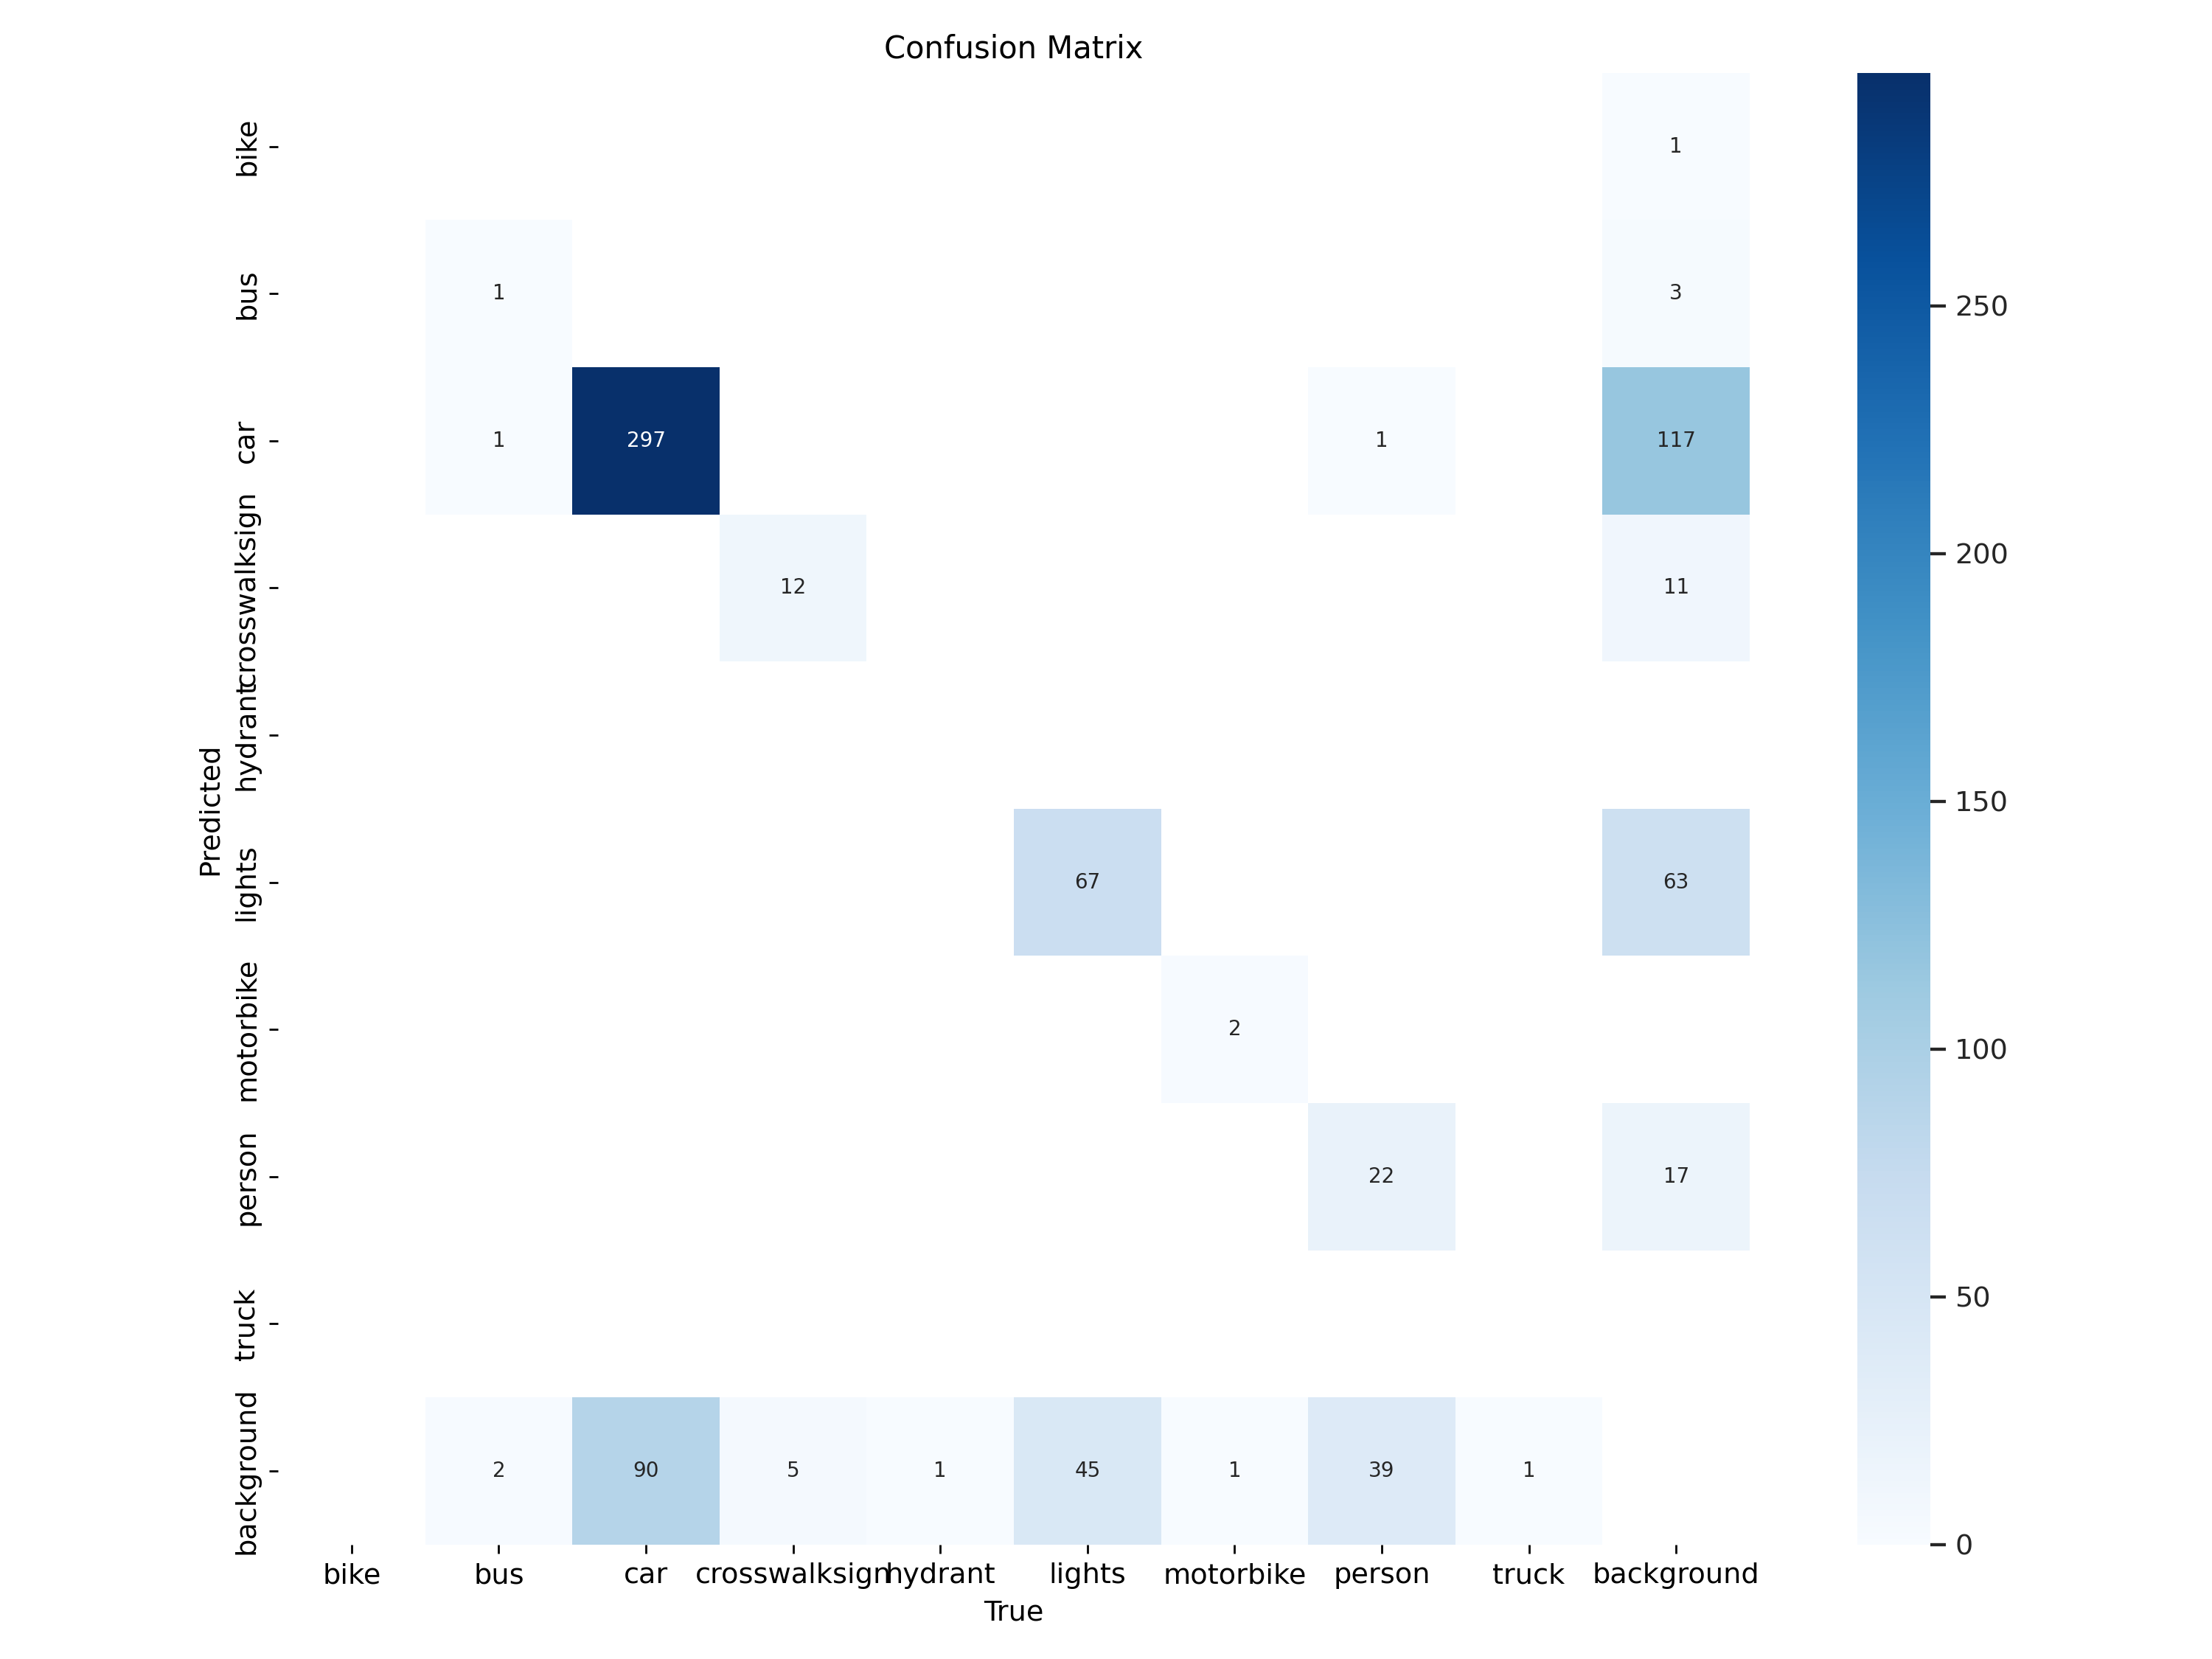

In [26]:
%cd {HOME}
Image(filename='/content/drive/MyDrive/yolo_wyniki_treningu/confusion_matrix.png', width=600)

/content


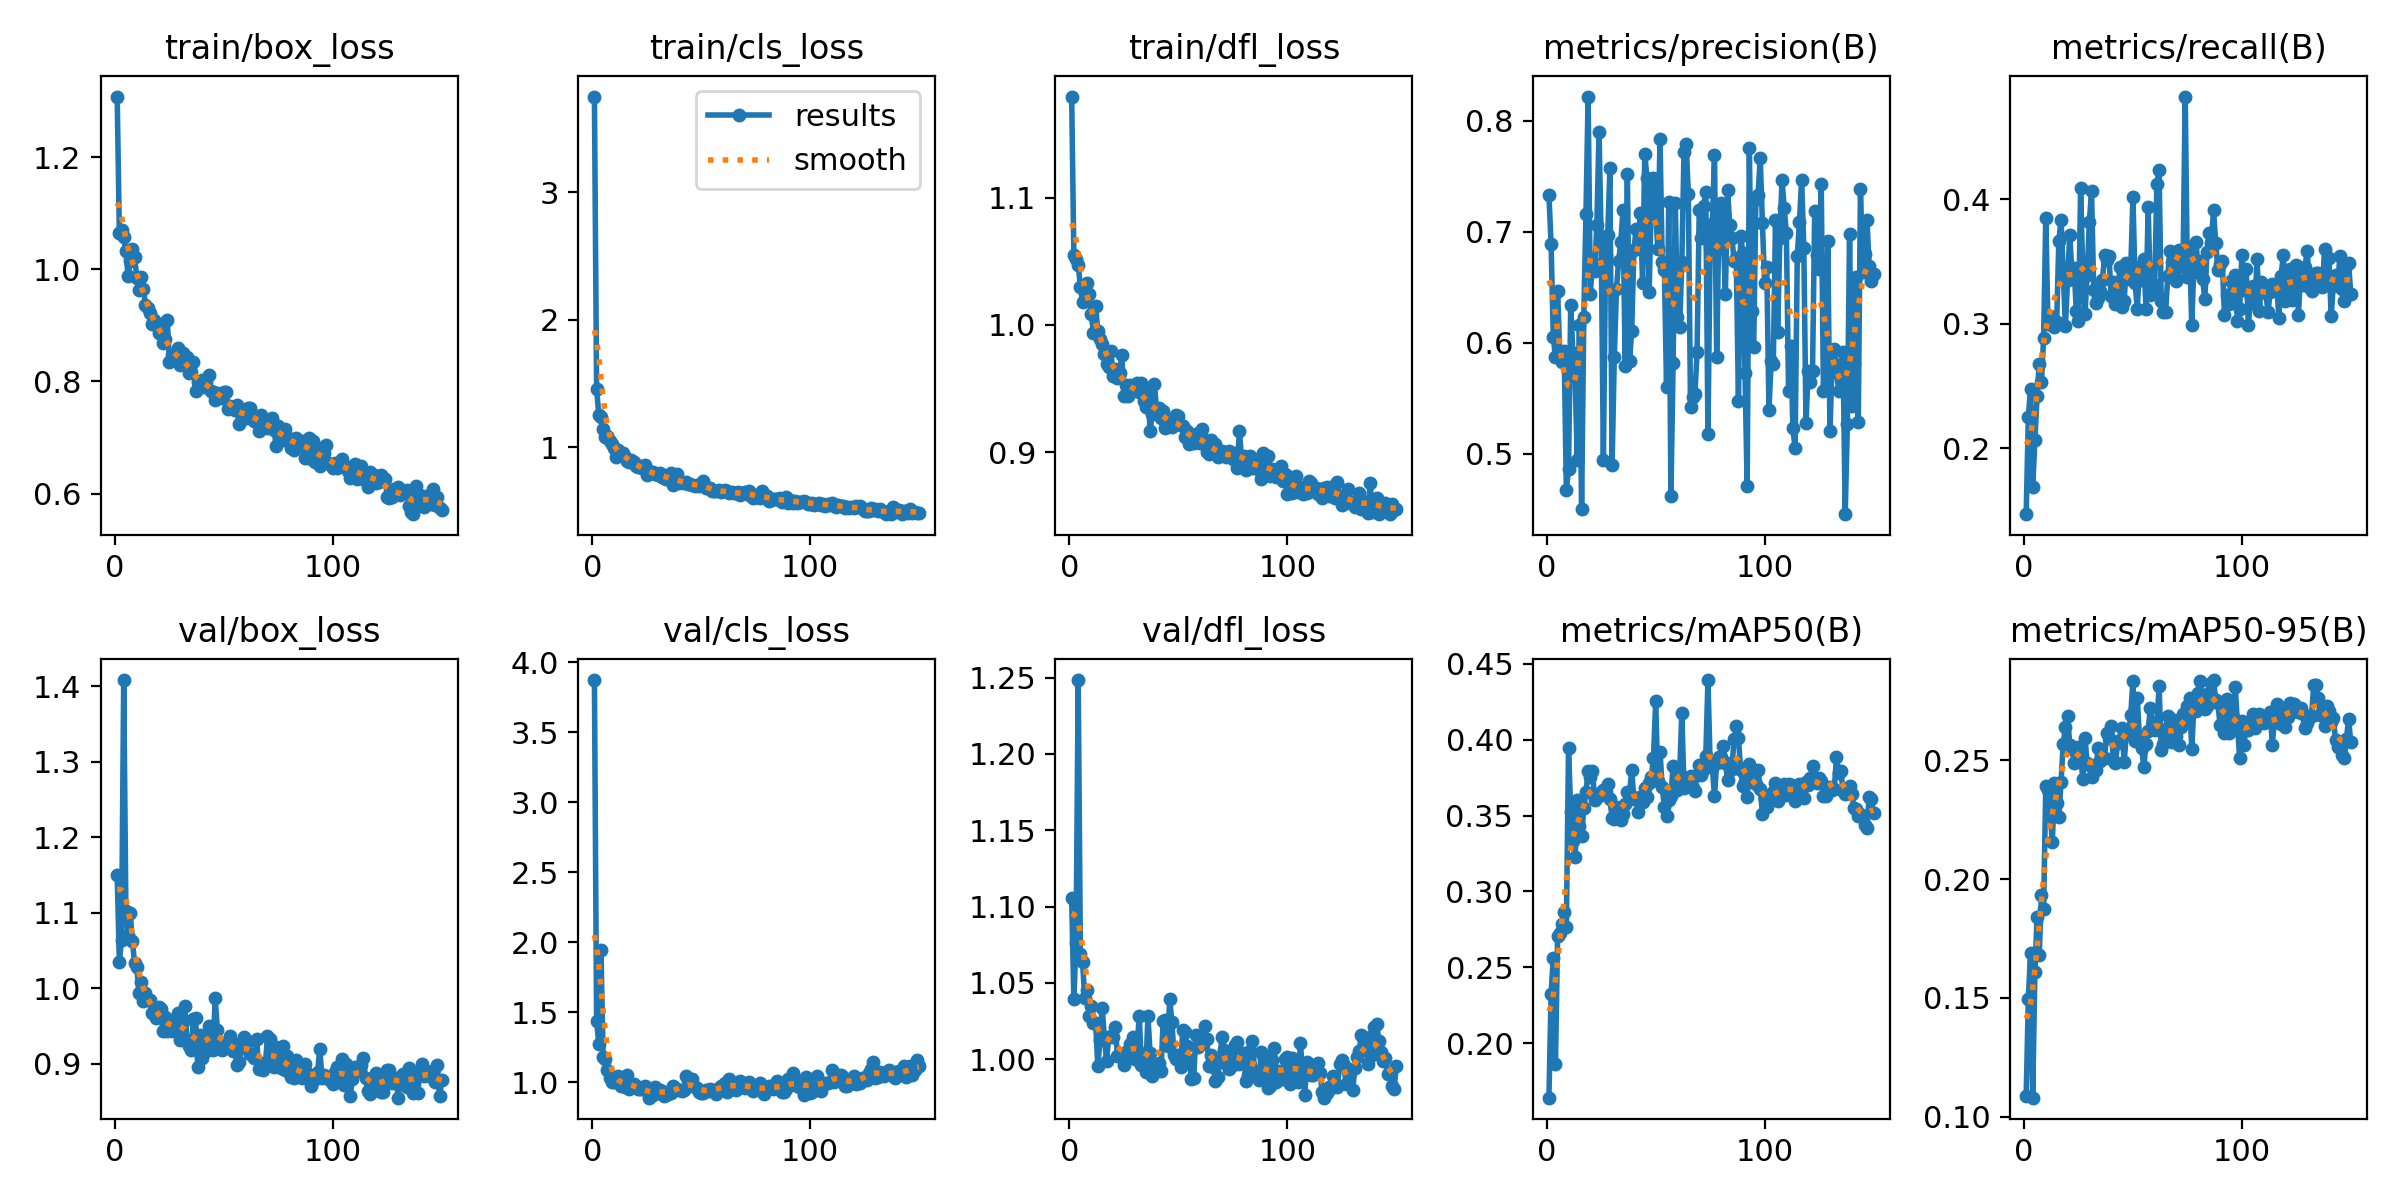

In [27]:
%cd {HOME}
Image(filename='/content/drive/MyDrive/yolo_wyniki_treningu/results.png', width=600)

/content


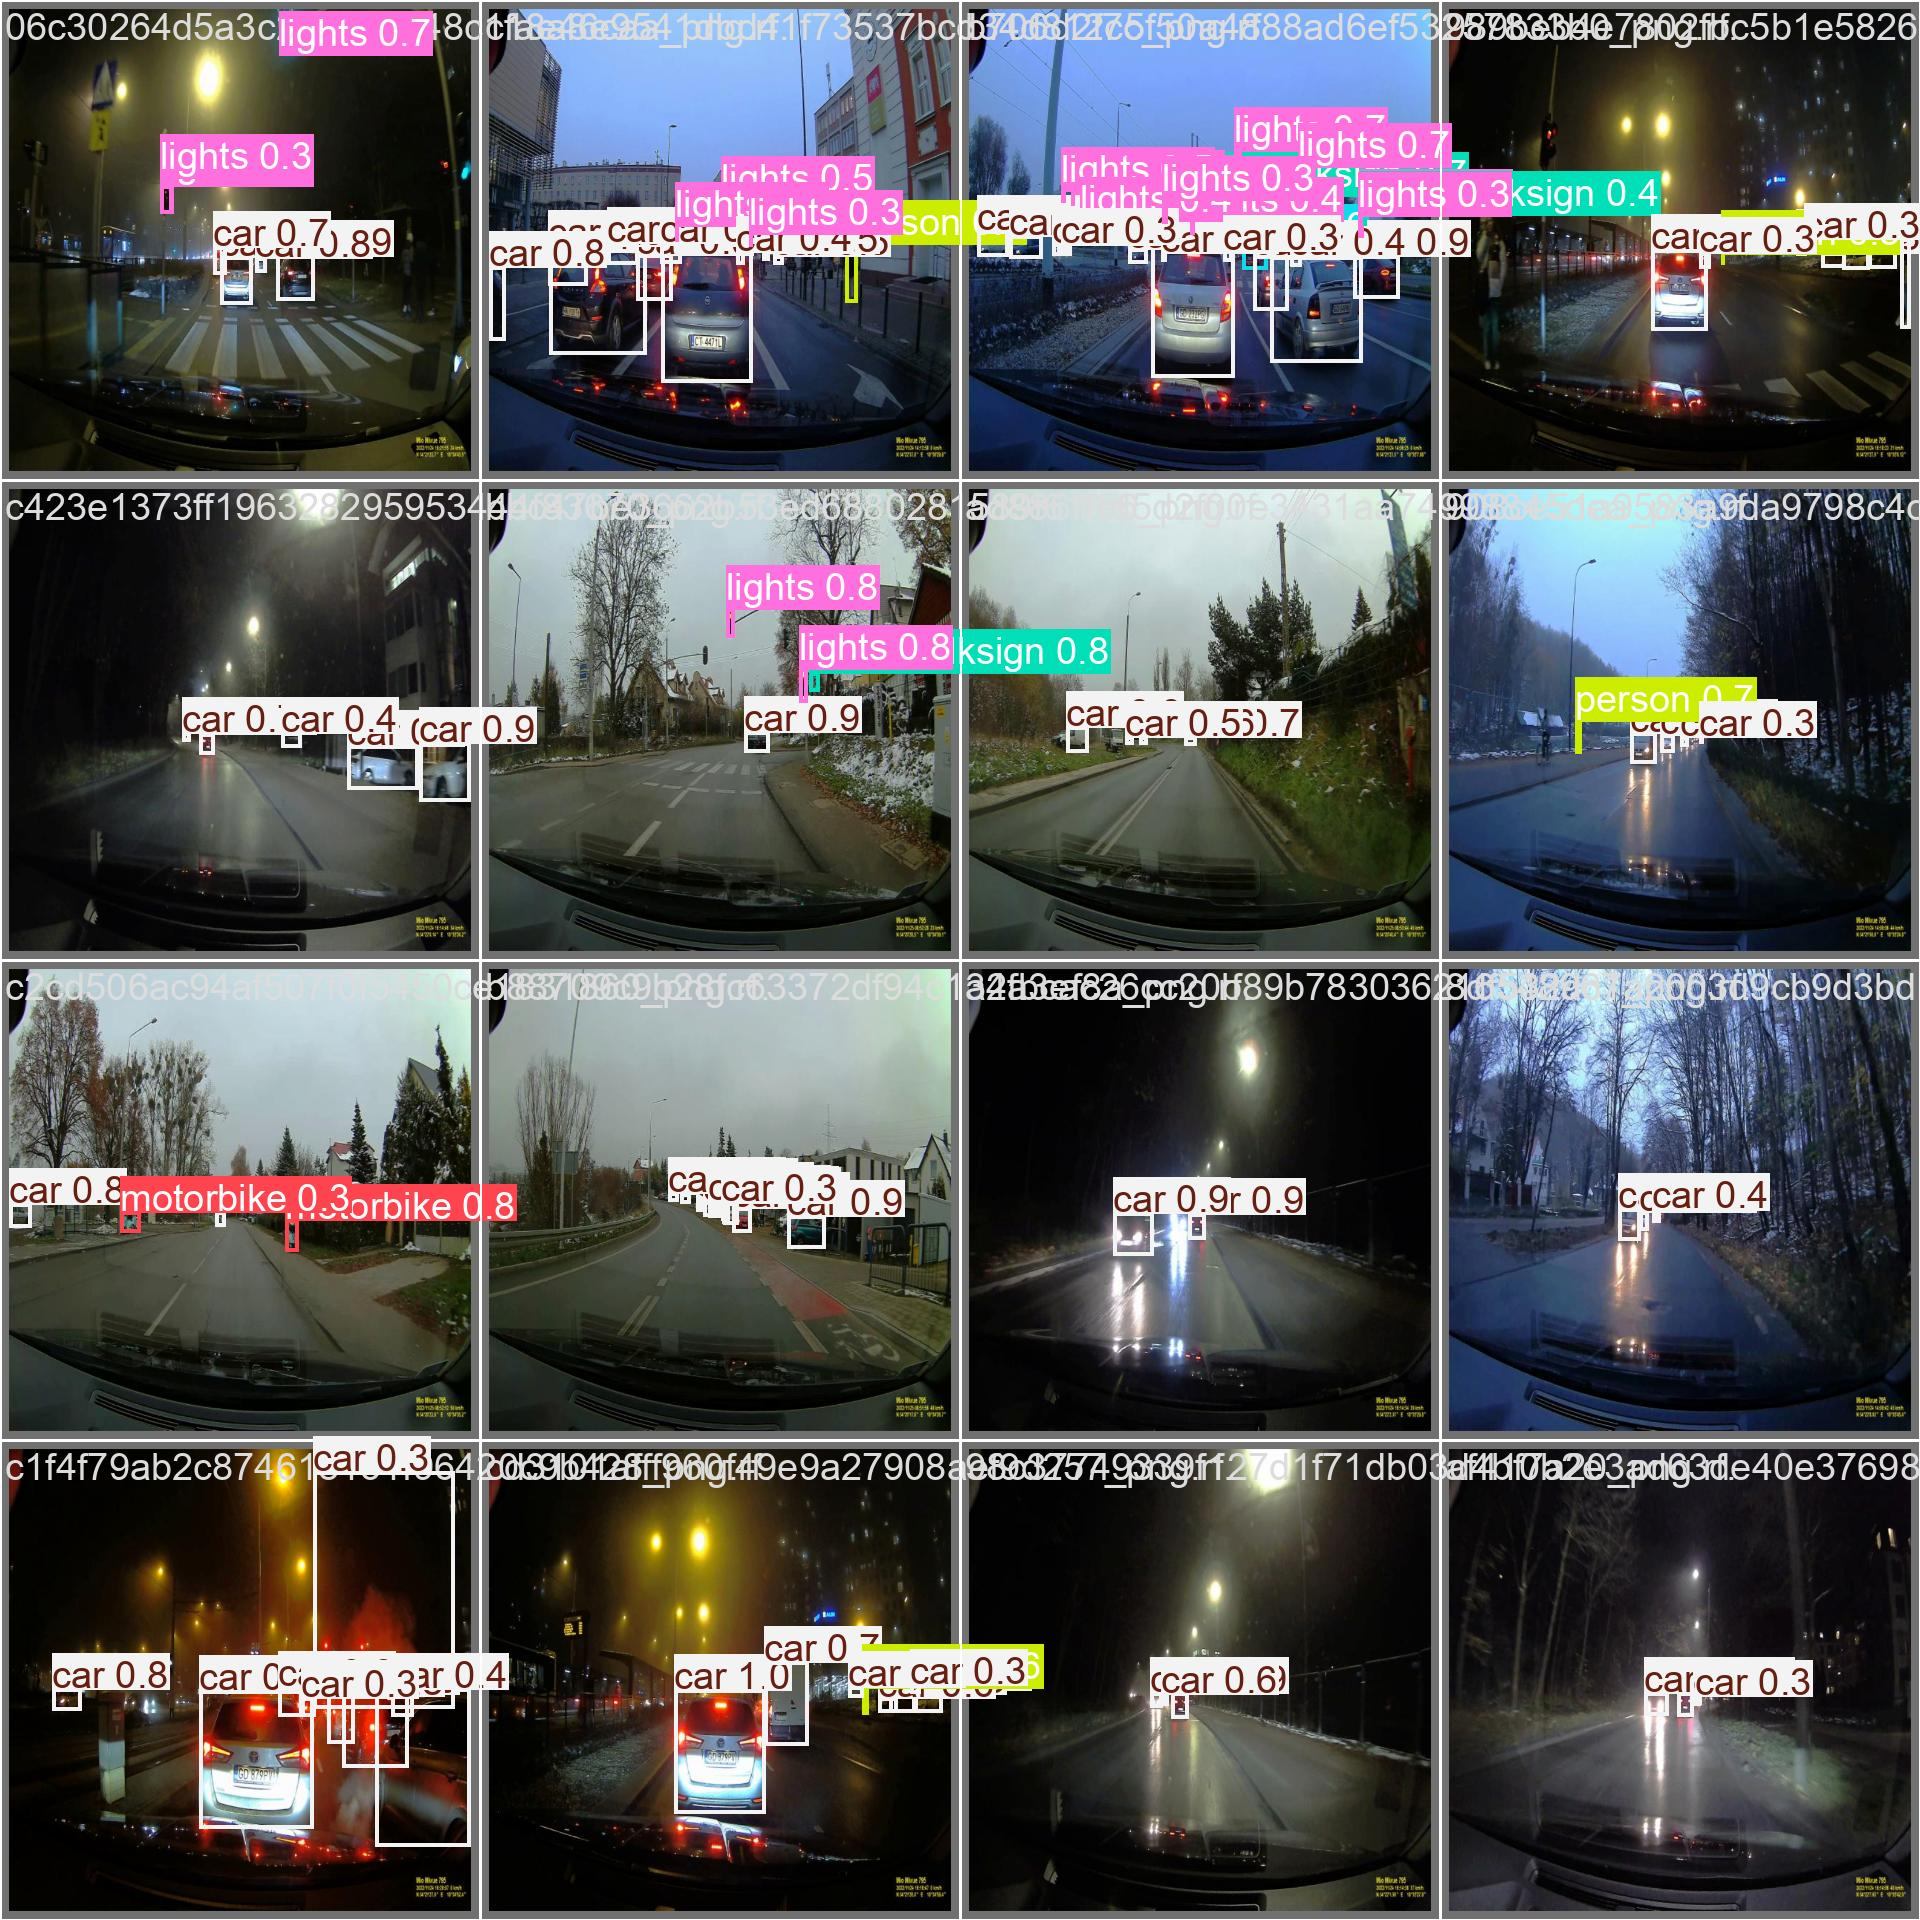

In [28]:
%cd {HOME}
Image(filename='/content/drive/MyDrive/yolo_wyniki_treningu/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [29]:
%cd {HOME}

!yolo task=detect mode=val model='/content/drive/MyDrive/yolo_wyniki_treningu/weights/best.pt' data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,129,067 parameters, 0 gradients, 28.5 GFLOPs
100% 755k/755k [00:00<00:00, 15.1MB/s]
val: Scanning /content/datasets/My-First-Project-3/valid/labels... 74 images, 0 backgrounds, 0 corrupt: 100% 74/74 [00:00<00:00, 507.63it/s]
val: New cache created: /content/datasets/My-First-Project-3/valid/labels.cache
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [02:03<00:00, 24.63s/it]
                   all         74        587      0.717      0.402      0.426      0.282
                   bus          4          4      0.225       0.25        0.3      0.261
                   car         67        

## Inference with Custom Model

In [25]:
%cd {HOME}
!yolo task=detect mode=predict model='/content/drive/MyDrive/yolo_wyniki_treningu/weights/best.pt' conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,129,067 parameters, 0 gradients, 28.5 GFLOPs

image 1/56 /content/datasets/My-First-Project-3/test/images/0031716148d092ba6a6a5de4b9eefee2_png.rf.403e23d6d7baf41e1877c825ddc5a43e.jpg: 800x800 8 cars, 1 lights, 1693.5ms
image 2/56 /content/datasets/My-First-Project-3/test/images/0160e2333b168d1e062c9c572bdc5791_png.rf.84603872f259fd26c3c8b22509981662.jpg: 800x800 8 cars, 3 lightss, 1299.5ms
image 3/56 /content/datasets/My-First-Project-3/test/images/03e75355e16fc57c6037cddf0e0ee755_png.rf.7188a8429427c1d931c8325365350cfa.jpg: 800x800 5 cars, 944.5ms
image 4/56 /content/datasets/My-First-Project-3/test/images/0c50355229ec7c456a6c496735786384_png.rf.fe532d9edc4c2e6b44320d743e991200.jpg: 800x800 2 cars, 981.2ms
image 5/56 /content/datasets/My-First-Project-3/test/images/0f0661fbea33c1b9af9734300956dc67_png.rf.58e69a34624402cb5b4d439316f6c3b2.jpg: 800x800 9 cars,

**NOTE:** Let's take a look at few results.

In [38]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:2]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
import os

# Create the new_images directory if it doesn't exist
new_images_path = os.path.join(HOME, 'new_images')
os.makedirs(new_images_path, exist_ok=True)
print(f"Directory '{new_images_path}' created or already exists.")

In [35]:
import os

%cd {HOME}

# Upewnij się, że masz już przesłane nowe zdjęcia do folderu {HOME}/new_images
new_images_path = os.path.join(HOME, 'new_images')

# Corrected model path to use the one from Google Drive
!yolo task=detect mode=predict model='/content/drive/MyDrive/yolo_wyniki_treningu/weights/best.pt' conf=0.25 source={new_images_path} save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,129,067 parameters, 0 gradients, 28.5 GFLOPs

image 1/5 /content/new_images/zdiecie2.png: 480x800 11 cars, 6 lightss, 907.8ms
image 2/5 /content/new_images/zdjecie1.png: 480x800 5 cars, 3 lightss, 2 persons, 968.1ms
image 3/5 /content/new_images/zdjecie3.png: 480x800 3 cars, 2 persons, 919.2ms
image 4/5 /content/new_images/zdjecie4.png: 480x800 2 cars, 1 crosswalksign, 3 persons, 906.2ms
image 5/5 /content/new_images/zdjecie5.png: 480x800 7 cars, 631.7ms
Speed: 6.7ms preprocess, 866.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 800)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
import glob
from IPython.display import Image, display
import os

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

# Now searching for .png files, as the input was .png
image_paths = glob.glob(f'{latest_folder}/*.png')[:3]

# Display each image
if not image_paths:
    print(f"Brak obrazów do wyświetlenia w {latest_folder}. Upewnij się, że nowe zdjęcia zostały prawidłowo przesłane i predykcja została wykonana.")
else:
    for image_path in image_paths:
        display(Image(filename=image_path, width=600))
        print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


Follow the links above to check if the upload succeeded. It may take a couple of minutes until the model is visible to the `roboflow` SDK.

In [32]:
# Run inference on your model on a persistent, auto-scaling, cloud API

# Load model
model = project.version(dataset.version).model
assert model, "Model deployment is still loading"

# Choose a random test image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 4763f6eeacf8ccf27dec4f6afa7e86dc_png.rf.eaf794ece9090da5e4a2657f1c377cba.jpg


{'predictions': [{'x': 25.5,
   'y': 348.0,
   'width': 45.0,
   'height': 44.0,
   'confidence': 0.8796519041061401,
   'class': 'car',
   'class_id': 2,
   'detection_id': '1ca9d08e-5101-4c7b-b730-4f73aedaf028',
   'image_path': '/content/datasets/My-First-Project-3/test/images/4763f6eeacf8ccf27dec4f6afa7e86dc_png.rf.eaf794ece9090da5e4a2657f1c377cba.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 487.5,
   'y': 367.0,
   'width': 47.0,
   'height': 46.0,
   'confidence': 0.691895604133606,
   'class': 'car',
   'class_id': 2,
   'detection_id': 'cafc32f3-2181-44c7-847d-023c9807c9d6',
   'image_path': '/content/datasets/My-First-Project-3/test/images/4763f6eeacf8ccf27dec4f6afa7e86dc_png.rf.eaf794ece9090da5e4a2657f1c377cba.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 318.0,
   'y': 359.5,
   'width': 28.0,
   'height': 43.0,
   'confidence': 0.6679918766021729,
   'class': 'car',
   'class_id': 2,
   'detection_id': '028430c1-6feb-4fcf-af90-20d18dfb0d92',
 